In [1]:
%pip install seaborn matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import yfinance as yf
import datetime as dt

# list of assets (updated with our chosen assets):
# Companies: Salesforce, HP, Lenovo, Ford, Tesla, Walmart, Target 
my_tickers = ["crm", "hpq", "lnvgy", "f", "tsla", "wmt", "tgt"]
etf_tickers = ["spy", "iwm", "dia"]

my_tickers, etf_tickers = [ticker.upper() for ticker in my_tickers], [etf.upper() for etf in etf_tickers]

# Assign a start date and end date for the data download, 1 year of data
start_date = dt.datetime.today() - pd.Timedelta(400, "d")
end_date = dt.datetime.today()

In [4]:
## Now download the data using the above variables, my_port is short for my portfolio. The portfolio consists of stock and etf data.
my_port = yf.download(start=start_date, end=end_date, tickers=my_tickers + etf_tickers)

c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[**********            20%%                      ]  2 of 10 completedc:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst

In [5]:
## And review the data:
my_port.head()

Price        Adj Close                                                \
Ticker             CRM         DIA          F        HPQ         IWM   
Date                                                                   
2023-02-10  166.812103  330.865051  11.924859  28.651936  187.515900   
2023-02-13  170.856812  334.596191  12.262090  29.005665  189.772293   
2023-02-14  169.738281  333.218994  12.149678  29.063026  189.683609   
2023-02-15  170.876801  333.726929  12.112209  29.187307  191.604996   
2023-02-16  167.890686  329.556061  12.093473  28.938740  189.772293   

Price                                                                 ...  \
Ticker          LNVGY         SPY         TGT        TSLA        WMT  ...   
Date                                                                  ...   
2023-02-10  16.035515  400.686249  163.480972  196.889999  47.026772  ...   
2023-02-13  16.198263  405.389923  166.654053  194.639999  47.743362  ...   
2023-02-14  16.246130  405.203369  165.618759  209.250000  47.605934  ...   
2023-02-15  16.179117  406.519196  170.311462  214.240005  47.959320  ...   
2023-02-16  17.040726  400.921936  168.879456  202.039993  47.206738  ...   

Price         Volume                                                         \
Ticker           CRM      DIA         F      HPQ       IWM  LNVGY       SPY   
Date                                                                          
2023-02-10  11273700  2523900  68205200  4136700  15248700  64500  70769700   
2023-02-13   8820300  2653900  64201900  4280900  15754400  24400  64913500   
2023-02-14   8393100  3501100  75352900  5647800  21889600  59400  88389300   
2023-02-15   4997000  1967700  65850000  4269600  18721200  44400  61555700   
2023-02-16   7483500  3229600  64145500  3514200  21366300  42500  76431500   

Price                                     
Ticker          TGT       TSLA       WMT  
Date                                      
2023-02-10  1841400  204754100  15002700  
2023-02-13  2432600  172475500  16015800  
2023-02-14  2418400  216455700  13831200  
2023-02-15  2954400  181006400  14674200  
2023-02-16  2318700  229586500  16312200  

[5 rows x 60 columns]

In [6]:
## We may only need one index of the multi-index that was returned (Adj Close)
my_port = my_port['Adj Close']

my_port.head()

Ticker,CRM,DIA,F,HPQ,IWM,LNVGY,SPY,TGT,TSLA,WMT
Date,,,,,,,,,,
2023-02-10,166.812103,330.865051,11.924859,28.651936,187.515900,16.035515,400.686249,163.480972,196.889999,47.026772
2023-02-13,170.856812,334.596191,12.262090,29.005665,189.772293,16.198263,405.389923,166.654053,194.639999,47.743362
2023-02-14,169.738281,333.218994,12.149678,29.063026,189.683609,16.246130,405.203369,165.618759,209.250000,47.605934
2023-02-15,170.876801,333.726929,12.112209,29.187307,191.604996,16.179117,406.519196,170.311462,214.240005,47.959320
2023-02-16,167.890686,329.556061,12.093473,28.938740,189.772293,17.040726,400.921936,168.879456,202.039993,47.206738


In [7]:
## Define a variable for daliy returns.
my_port_d_returns = my_port.pct_change()

In [8]:
## Create a pandas dataframe to hold values that are calculated into a table. Index the table with the 7 stocks.
my_port_table = pd.DataFrame(index = my_tickers)
    

In [9]:
## Calculation for 1a. and 1b. in the 1st project. Column of the tickers and portfolio weights. Revised calculation to change portfolio weight from decimal to whole number.
# Credit goes to the professor for this revision.

port_weight = 100 / len(my_tickers)
my_port_table['Portfolio_Weight'] = port_weight

my_port_table



,Portfolio_Weight
CRM,14.285714
HPQ,14.285714
LNVGY,14.285714
F,14.285714
TSLA,14.285714
WMT,14.285714
TGT,14.285714


In [10]:
## What I did to calculate 1c.(Annualized Volatility) before represented as a multi line comment.
'''
def get_stock_prices(my_tickers, start_date, end_date):
    my_port
    return my_port

stock_prices = get_stock_prices(my_tickers, start_date, end_date)
returns_3months = stock_prices.pct_change().rolling(window=63).sum().dropna()
volatility = returns_3months.std() * (252 ** 0.5)
result_df = pd.DataFrame({'Ticker': my_tickers, 'Volatility': volatility})

print(result_df)
'''

"\ndef get_stock_prices(my_tickers, start_date, end_date):\n    my_port\n    return my_port\n\nstock_prices = get_stock_prices(my_tickers, start_date, end_date)\nreturns_3months = stock_prices.pct_change().rolling(window=63).sum().dropna()\nvolatility = returns_3months.std() * (252 ** 0.5)\nresult_df = pd.DataFrame({'Ticker': my_tickers, 'Volatility': volatility})\n\nprint(result_df)\n"

In [11]:
## Calculation of 1c. based on how the professor did it.
my_port_table['Annualized Volatility'] = my_port_d_returns[-63:].std() * (252 ** (1/2)) * 100
my_port_table

,Portfolio_Weight,Annualized Volatility
CRM,14.285714,26.065368
HPQ,14.285714,22.282266
LNVGY,14.285714,46.141619
F,14.285714,34.063467
TSLA,14.285714,45.802131
WMT,14.285714,14.010689
TGT,14.285714,32.608805


In [12]:
## This is how we calculated 1d. to 1f. before represented as multi-line comments.
'''
## First download Adjusted Close Price data for S&P 500 ETF
spy = yf.download(start=start_date, end=end_date, tickers='SPY')
spy = spy['Adj Close']

## Combine portfolio and SPY data into a single DataFrame
my_port_and_spy_data = pd.concat([my_port, spy], axis=1)
my_port_and_spy_data.columns = my_tickers + ['SPY']

## Calculate daily returns
my_port_and_spy__d_returns = my_port_and_spy_data.pct_change().dropna()

## Calculate covariance matrix
my_port_and_spy_cov_matrix = my_port_and_spy__d_returns.cov()

## Extract covariances with SPY
cov_with_spy = my_port_and_spy_cov_matrix['SPY'].drop('SPY')  

## Calculate SPY variance
spy_variance = my_port_and_spy_cov_matrix.loc['SPY', 'SPY']

# Calculate beta
betas_spy = cov_with_spy / spy_variance

spy_beta_table = pd.DataFrame({'Tickers': my_tickers, 'Beta': betas_spy})
print(spy_beta_table)
'''

'''
## Then calculate the daily returns of portfolio and S&P 500 ETF
my_port_d_returns = prices.pct_change().dropna()
spy_d_returns = spy.pct_change().dropna()

covariances = my_port_d_returns.covwith(spy_d_returns)
'''



'\n## Then calculate the daily returns of portfolio and S&P 500 ETF\nmy_port_d_returns = prices.pct_change().dropna()\nspy_d_returns = spy.pct_change().dropna()\n\ncovariances = my_port_d_returns.covwith(spy_d_returns)\n'

In [13]:
### Calculation of 1d. to 1f. based on how the professor did it.
# First calculate covariance and variance for all assets and etfs by using return data.
ret_covs = my_port_d_returns[-252:].cov()
ret_vars = my_port_d_returns[-252:].var()

# Then loop through ETFs to calculate betas against assets.
for etf in etf_tickers:
    my_port_table[etf + "_beta"] = ret_covs[etf] / ret_vars[etf]

my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta
CRM,14.285714,26.065368,1.253743,0.520641,1.300969
HPQ,14.285714,22.282266,0.993016,0.599540,1.159917
LNVGY,14.285714,46.141619,0.853505,0.645373,0.891987
F,14.285714,34.063467,1.264358,0.916569,1.612677
TSLA,14.285714,45.802131,2.108953,1.049122,1.858435
WMT,14.285714,14.010689,0.324743,0.131307,0.469164
TGT,14.285714,32.608805,0.756434,0.598261,1.134273


In [14]:
## Now I will calculate the betas again by using adjusted close price data instead of daily return data to compare with the return data results.
## Also known as the backtest.
# First, calculate covariance and variance for all assets and etfs by using adjusted close price data.
raw_covs = my_port[-252:].cov()    # my_port is the variable that holds the adjusted close price data (raw dollar values) of all assets and etfs.
raw_vars = my_port[-252:].var()

# Then loop through ETFs to calculate betas against assets.
for etf in etf_tickers:
    my_port_table[etf + "_beta"] = raw_covs[etf] / raw_vars[etf]

my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta
CRM,14.285714,26.065368,1.022192,2.554743,1.551622
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764
F,14.285714,34.063467,0.006257,0.042563,0.005350
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081
WMT,14.285714,14.010689,0.076397,0.152403,0.104090
TGT,14.285714,32.608805,0.094751,0.516707,0.243194


In [15]:
## This is how I calculated 1g., Average Weekly Drawdown before represented as the comment below.

# av_w_drawdown = (my_port.rolling(5).min() - my_port.rolling(5).max()).mean() 




In [16]:
## Now I will calculate the Average Weekly Drawdown similar to how the professor did it, but minus the object oriented way that the professor did.
# Instead, I will just enter the whole calculation into a variable that creates another column for Average Weekly Drawdown.
my_port_table["Av_Weekky_DD"] = (((my_port_d_returns.rolling(5).min() - my_port_d_returns.rolling(5).max()) / my_port_d_returns.rolling(5).max())[-252:]).mean()

my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta,Av_Weekky_DD
CRM,14.285714,26.065368,1.022192,2.554743,1.551622,-1.910575
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778,-inf
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764,-inf
F,14.285714,34.063467,0.006257,0.042563,0.005350,-inf
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081,-1.812081
WMT,14.285714,14.010689,0.076397,0.152403,0.104090,-2.125031
TGT,14.285714,32.608805,0.094751,0.516707,0.243194,-2.265598


In [17]:
## This is how I calculated 1h., Maximum Weekly before represented as the comment below.

# max_w_drawdown = (my_port.rolling(5).min() - my_port.rolling(5).max()).max()




In [18]:
## Now I will calculate the Maximum Weekly Drawdown similar to how the professor did it, but minus the object oriented way that the professor did.
# Instead, I will just enter the whole calculation into a variable that creates another column for Maximum Weekly Drawdown.
my_port_table["Max_Weekky_DD"] = (((my_port_d_returns.rolling(5).min() - my_port_d_returns.rolling(5).max()) / my_port_d_returns.rolling(5).max())[-252:]).max()  # apply .max() to the (52-week Low minus 52-week High) / 52-week High calculation instead .mean()

my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta,Av_Weekky_DD,Max_Weekky_DD
CRM,14.285714,26.065368,1.022192,2.554743,1.551622,-1.910575,54.768210
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778,-inf,94.368311
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764,-inf,222.080449
F,14.285714,34.063467,0.006257,0.042563,0.005350,-inf,14.037398
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081,-1.812081,165.213582
WMT,14.285714,14.010689,0.076397,0.152403,0.104090,-2.125031,4.465593
TGT,14.285714,32.608805,0.094751,0.516707,0.243194,-2.265598,24.851981


In [19]:
## Calculation of 1i., Total Return (using trailing 10-years)

start_date = dt.datetime.today() - pd.Timedelta(3650, "d")  # First, put 3650, which represents 10 years from today.
my_port = yf.download(start=start_date, end=end_date, tickers=my_tickers + etf_tickers)  # Then download data for 10 years
my_port = my_port['Adj Close'] # Take only adjusted close price data
t_return = my_port.pct_change().sum()[-20:] # Calculate the yearly returns for each stock, then add up the yearly returns of each stock, then only take into account the last 20 days of data for a trailing calculation
t_return



c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\samue\AppData\Local\Programs\Python\Pytho

c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  10 of 10 completed


Ticker
CRM      2.212263
DIA      1.233845
F        0.853623
HPQ      1.618415
IWM      0.912729
LNVGY    1.269768
SPY      1.342689
TGT      1.770677
TSLA     3.869037
WMT      1.321184
dtype: float64

In [20]:
## Table with 1i included.
my_port_table['Total Return'] = t_return
my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta,Av_Weekky_DD,Max_Weekky_DD,Total Return
CRM,14.285714,26.065368,1.022192,2.554743,1.551622,-1.910575,54.768210,2.212263
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778,-inf,94.368311,1.618415
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764,-inf,222.080449,1.269768
F,14.285714,34.063467,0.006257,0.042563,0.005350,-inf,14.037398,0.853623
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081,-1.812081,165.213582,3.869037
WMT,14.285714,14.010689,0.076397,0.152403,0.104090,-2.125031,4.465593,1.321184
TGT,14.285714,32.608805,0.094751,0.516707,0.243194,-2.265598,24.851981,1.770677


In [21]:
## Calculation of 1j., Annualized Total Return (using trailing 10-years)

t_return_ann = ((my_port.pct_change().sum()[-20:] + 1) ** 252) - 1 
t_return_ann

Ticker
CRM      5.204589e+127
DIA       9.149311e+87
F         3.478528e+67
HPQ      2.216748e+105
IWM       9.477520e+70
LNVGY     5.097226e+89
SPY       1.472633e+93
TGT      3.401453e+111
TSLA     1.720489e+173
WMT       1.441526e+92
dtype: float64

In [22]:
## Stock porfolio table with 1j included.
my_port_table['Annualized Total Return'] = t_return_ann
my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta,Av_Weekky_DD,Max_Weekky_DD,Total Return,Annualized Total Return
CRM,14.285714,26.065368,1.022192,2.554743,1.551622,-1.910575,54.768210,2.212263,5.204589e+127
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778,-inf,94.368311,1.618415,2.216748e+105
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764,-inf,222.080449,1.269768,5.097226e+89
F,14.285714,34.063467,0.006257,0.042563,0.005350,-inf,14.037398,0.853623,3.478528e+67
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081,-1.812081,165.213582,3.869037,1.720489e+173
WMT,14.285714,14.010689,0.076397,0.152403,0.104090,-2.125031,4.465593,1.321184,1.441526e+92
TGT,14.285714,32.608805,0.094751,0.516707,0.243194,-2.265598,24.851981,1.770677,3.401453e+111


In [23]:
## Calculation and plot of the correlation matrix, #3
# First calculate the correlation matrix by using adjusted close price data. 
correlation_matrix = my_port.corr()
correlation_matrix


Ticker,CRM,DIA,F,HPQ,IWM,LNVGY,SPY,TGT,TSLA,WMT
Ticker,,,,,,,,,,
CRM,1.000000,0.914870,0.352527,0.789977,0.895145,0.465744,0.917049,0.849970,0.794016,0.906913
DIA,0.914870,1.000000,0.506203,0.933444,0.943793,0.519062,0.990985,0.852626,0.855993,0.961079
F,0.352527,0.506203,1.000000,0.653657,0.562213,0.660882,0.568236,0.589247,0.716438,0.425929
HPQ,0.789977,0.933444,0.653657,1.000000,0.914525,0.569925,0.934515,0.823513,0.885134,0.862602
IWM,0.895145,0.943793,0.562213,0.914525,1.000000,0.527071,0.937881,0.890599,0.860871,0.867590
LNVGY,0.465744,0.519062,0.660882,0.569925,0.527071,1.000000,0.578792,0.571836,0.658581,0.552003
SPY,0.917049,0.990985,0.568236,0.934515,0.937881,0.578792,1.000000,0.879457,0.903225,0.962592
TGT,0.849970,0.852626,0.589247,0.823513,0.890599,0.571836,0.879457,1.000000,0.901514,0.839341
TSLA,0.794016,0.855993,0.716438,0.885134,0.860871,0.658581,0.903225,0.901514,1.000000,0.843827


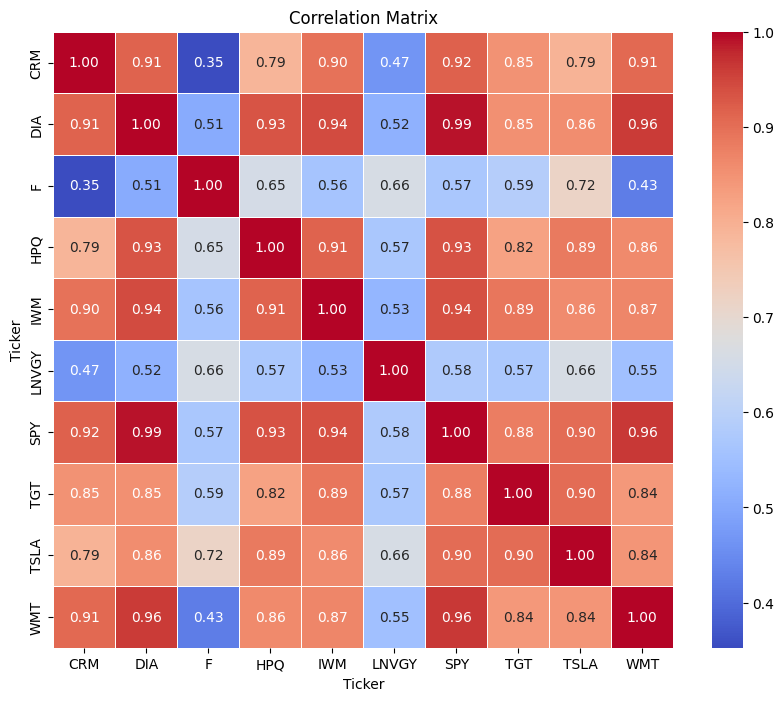

In [24]:
## Then plot the correlation matrix by using features of the seaborn and matplotlib libraries.
# Credit to Lindalin1234 for the code to plot the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [25]:
## Backtest
# Now I will calculate the correlation matrix by using daily return data instead of adjusted close price data. 
ret_correlation_matrix = my_port_d_returns.corr() # A new variable is defined to indicate that this correlation matrix was calculated by using daily return data.
ret_correlation_matrix

Ticker,CRM,DIA,F,HPQ,IWM,LNVGY,SPY,TGT,TSLA,WMT
Ticker,,,,,,,,,,
CRM,1.000000,0.514093,0.180938,0.229303,0.401073,0.078261,0.561899,0.054655,0.257624,0.050428
DIA,0.514093,1.000000,0.518400,0.498493,0.769655,0.175105,0.893619,0.365127,0.402774,0.307834
F,0.180938,0.518400,1.000000,0.366825,0.565212,0.110957,0.478838,0.275384,0.323363,0.105623
HPQ,0.229303,0.498493,0.366825,1.000000,0.507925,0.104924,0.507865,0.295503,0.231364,0.084345
IWM,0.401073,0.769655,0.565212,0.507925,1.000000,0.256063,0.758323,0.379088,0.445483,0.168257
LNVGY,0.078261,0.175105,0.110957,0.104924,0.256063,1.000000,0.197785,0.092028,0.072689,0.049485
SPY,0.561899,0.893619,0.478838,0.507865,0.758323,0.197785,1.000000,0.301091,0.522344,0.254978
TGT,0.054655,0.365127,0.275384,0.295503,0.379088,0.092028,0.301091,1.000000,0.121719,0.242792
TSLA,0.257624,0.402774,0.323363,0.231364,0.445483,0.072689,0.522344,0.121719,1.000000,0.117511


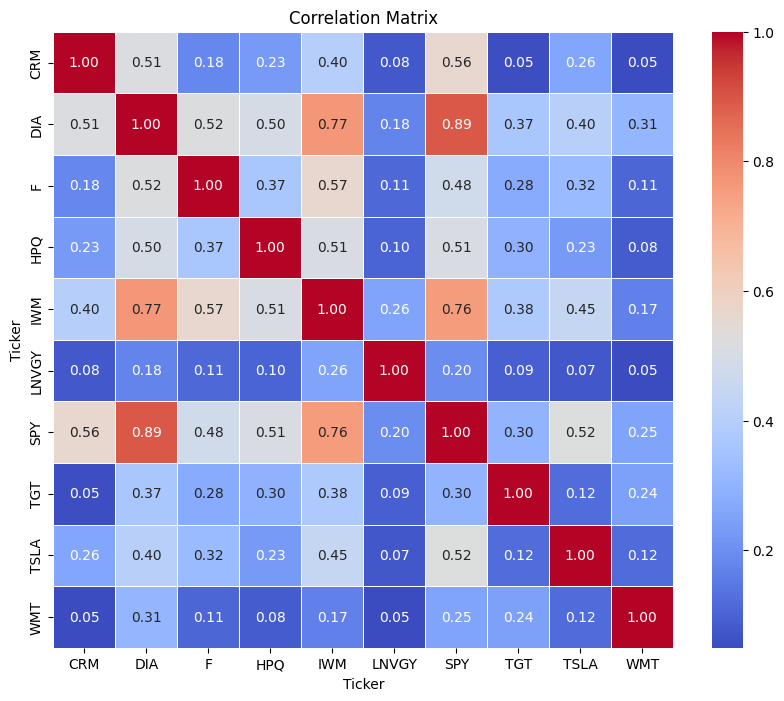

In [26]:
## Then plot the daily return data correlation matrix by using features of the seaborn and matplotlib libraries.
plt.figure(figsize=(10, 8))
sns.heatmap(ret_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [27]:
## The code below was another way that we tried to calculate the Average Weekly Drawdown, 1g.

In [28]:
'''
## Calculation of 1g., Average Weekly Drawdown, (52-week Low minus 52-week High) / 52-week High

## First, calculate the 52 week low.

# Create an empty DataFrame to store the data
my_port_table = pd.DataFrame()


# Fetch historical data for each stock
for ticker in my_tickers:
    stock = yf.Ticker(ticker)
    historical_data = stock.history(period='1y')  # Fetch 1-year historical data
    my_port_table[ticker] = historical_data['Low']

# Calculate the 52-week low for each stock
my_port_table['52-week Low'] = my_port_table.min(axis=1)

print(my_port_table[['52-week Low']])
''' 

"\n## Calculation of 1g., Average Weekly Drawdown, (52-week Low minus 52-week High) / 52-week High\n\n## First, calculate the 52 week low.\n\n# Create an empty DataFrame to store the data\nmy_port_table = pd.DataFrame()\n\n\n# Fetch historical data for each stock\nfor ticker in my_tickers:\n    stock = yf.Ticker(ticker)\n    historical_data = stock.history(period='1y')  # Fetch 1-year historical data\n    my_port_table[ticker] = historical_data['Low']\n\n# Calculate the 52-week low for each stock\nmy_port_table['52-week Low'] = my_port_table.min(axis=1)\n\nprint(my_port_table[['52-week Low']])\n"

In [29]:

'''
## Then calculate 52-week high 
# Fetch historical data for each stock
for ticker in my_tickers:
    stock = yf.Ticker(ticker)
    historical_data = stock.history(period='1y')  # Fetch 1-year historical data
    my_port_table[ticker] = historical_data['High']

# Calculate the 52-week low for each stock
my_port_table['52-week High'] = my_port_table.max(axis=1)
'''


"\n## Then calculate 52-week high \n# Fetch historical data for each stock\nfor ticker in my_tickers:\n    stock = yf.Ticker(ticker)\n    historical_data = stock.history(period='1y')  # Fetch 1-year historical data\n    my_port_table[ticker] = historical_data['High']\n\n# Calculate the 52-week low for each stock\nmy_port_table['52-week High'] = my_port_table.max(axis=1)\n"

In [30]:
'''
## Now calculate the Average Weekly Drawdown, (52-week Low minus 52-week High) / 52-week High
av__w_drawdown = ((my_port_table['52-week Low'] - my_port_table['52-week High']) / my_port_table['52-week High']) * 100
'''


"\n## Now calculate the Average Weekly Drawdown, (52-week Low minus 52-week High) / 52-week High\nav__w_drawdown = ((my_port_table['52-week Low'] - my_port_table['52-week High']) / my_port_table['52-week High']) * 100\n"

In [31]:
'''
my_port_table = pd.DataFrame(av__w_drawdown, columns=['Average Weekly Drawdown'], index=my_tickers)
my_port_table
''' 

"\nmy_port_table = pd.DataFrame(av__w_drawdown, columns=['Average Weekly Drawdown'], index=my_tickers)\nmy_port_table\n"

In [32]:

## This is how we attempted to calculate the values for number 3 in the project.
'''
ETF_tickers = ['SPY', 'IWM', 'DIA']
ETF_data = yf.download(start=start_date, end=end_date, tickers=ETF_tickers)
ETF_data.head()
ETF_data = ETF_data['Adj Close']
ETF_data.head()

Port_and_ETF_data = {
    'portfolio data': my_port,
     'ETF data': ETF_data
}

All_Tickers = my_tickers.extend(ETF_tickers)
print(All_Tickers)

'''






"\nETF_tickers = ['SPY', 'IWM', 'DIA']\nETF_data = yf.download(start=start_date, end=end_date, tickers=ETF_tickers)\nETF_data.head()\nETF_data = ETF_data['Adj Close']\nETF_data.head()\n\nPort_and_ETF_data = {\n    'portfolio data': my_port,\n     'ETF data': ETF_data\n}\n\nAll_Tickers = my_tickers.extend(ETF_tickers)\nprint(All_Tickers)\n\n"

In [33]:
'''
Port_and_ETF_table = pd.DataFrame(Port_and_ETF_data)
ETF_table = pd.DataFrame(ETF_data,columns=['Adj Close'], index=ETF_tickers)
ETF_table
'''

"\nPort_and_ETF_table = pd.DataFrame(Port_and_ETF_data)\nETF_table = pd.DataFrame(ETF_data,columns=['Adj Close'], index=ETF_tickers)\nETF_table\n"